In [1]:
import bvhio

sample_path = 'gait3d/Sequences/p9s4/MoCap/p9s4.bvh'

root = bvhio.readAsHierarchy(sample_path)
root.printTree()

root
+- lhipjoint
|  +- lfemur
|     +- ltibia
|        +- lfoot
|           +- ltoes
+- rhipjoint
|  +- rfemur
|     +- rtibia
|        +- rfoot
|           +- rtoes
+- lowerback
   +- upperback
      +- thorax
         +- lowerneck
         |  +- upperneck
         |     +- head
         +- lshoulderjoint
         |  +- lhumerus
         |     +- lradius
         |        +- lwrist
         |           +- lhand
         +- rshoulderjoint
            +- rhumerus
               +- rradius
                  +- rwrist
                     +- rhand


In [2]:
root.loadRestPose(recursive=True)
for joint, index, depth in root.layout():
    print(f'{joint.PositionWorld} {joint.UpWorld} {joint.Name}')

vec3(            0,            0,            0 ) vec3(            0,            1,            0 ) root
vec3(            0,            0,            0 ) vec3(     0.907045,    -0.193927,     0.373713 ) lhipjoint
vec3(      0.53825,    -0.115078,     0.221765 ) vec3(     0.173648,    -0.984808,  2.70915e-08 ) lfemur
vec3(      0.80746,     -1.64185,     0.221765 ) vec3(     0.173532,    -0.984828,  2.70953e-08 ) ltibia
vec3(       1.0918,     -3.25552,     0.221765 ) vec3(  2.40917e-08,     -0.45995,     0.887945 ) lfoot
vec3(       1.0918,     -3.49782,     0.689541 ) vec3(  3.91462e-08,  5.96046e-08,            1 ) ltoes
vec3(            0,            0,            0 ) vec3(     -0.90311,    -0.197785,     0.381148 ) rhipjoint
vec3(    -0.525461,    -0.115078,     0.221765 ) vec3(    -0.173648,    -0.984808,            0 ) rfemur
vec3(    -0.812352,     -1.74212,     0.221765 ) vec3(    -0.173651,    -0.984807,            0 ) rtibia
vec3(     -1.09543,      -3.3475,     0.221765 ) vec3

In [3]:
with open(sample_path, "r") as file:
    for i, line in enumerate(file):
        if i == 160:
            break
        print(line, end='')


HIERARCHY
ROOT root
{
	OFFSET	0.000000	0.000000	0.000000
	CHANNELS 6 Xposition Yposition Zposition Zrotation Yrotation Xrotation
	JOINT lhipjoint
	{
		OFFSET	0.000000	0.000000	0.000000
		CHANNELS 3 Zrotation Yrotation Xrotation
		JOINT lfemur
		{
			OFFSET	0.538250	-0.115078	0.221765
			CHANNELS 3 Zrotation Yrotation Xrotation
			JOINT ltibia
			{
				OFFSET	0.269210	-1.526767	0.000000
				CHANNELS 3 Zrotation Yrotation Xrotation
				JOINT lfoot
				{
					OFFSET	0.284337	-1.613671	0.000000
					CHANNELS 3 Zrotation Yrotation Xrotation
					JOINT ltoes
					{
						OFFSET	0.000000	-0.242305	0.467776
						CHANNELS 3 Zrotation Yrotation Xrotation
						End Site
						{
							OFFSET	0.000000	-0.000000	0.253715
						}
					}
				}
			}
		}
	}
	JOINT rhipjoint
	{
		OFFSET	0.000000	0.000000	0.000000
		CHANNELS 3 Zrotation Yrotation Xrotation
		JOINT rfemur
		{
			OFFSET	-0.525461	-0.115078	0.221765
			CHANNELS 3 Zrotation Yrotation Xrotation
			JOINT rtibia
			{
				OFFSET	-0.286891	-1.62

In [4]:
import bvhio

seq_key = 'p7s1'

sample_path = f'gait3d/Sequences/{seq_key}/MoCap/{seq_key}.bvh'

root = bvhio.readAsHierarchy(sample_path)
root = bvhio.Joint('Root', restPose=bvhio.Transform(scale=2.54)).attach(root)

# Load poses, then extract from all joints their position in world space.
pose0positions = [joint.PositionWorld for (joint, index, depth) in root.loadPose(0).layout()]
pose1positions = [joint.PositionWorld for (joint, index, depth) in root.loadPose(1).layout()]

print('Change in positions in centimeters between frame 0 and 1:')
for (joint, index, depth) in root.layout():
    print(f'{pose1positions[index] - pose0positions[index]} {joint.Name}')


Change in positions in centimeters between frame 0 and 1:
vec3(            0,            0,            0 ) Root
vec3(   0.00029999,  4.95911e-05,  0.000390947 ) root
vec3(   0.00029999,  4.95911e-05,  0.000390947 ) lhipjoint
vec3(  0.000337109,  3.43323e-05,  0.000390202 ) lfemur
vec3(  0.000376701,  4.31538e-05,  0.000208929 ) ltibia
vec3(  4.50313e-05,  6.19888e-06,  9.25362e-05 ) lfoot
vec3(  7.56234e-05, -9.63211e-05,  0.000230983 ) ltoes
vec3(   0.00029999,  4.95911e-05,  0.000390947 ) rhipjoint
vec3(  0.000276715,  5.50747e-05,  0.000394583 ) rfemur
vec3(  0.000213414,  4.62532e-05,  0.000329077 ) rtibia
vec3(  0.000144184,   3.6478e-05,  0.000257432 ) rfoot
vec3(  0.000136256, -4.07696e-05,  0.000272453 ) rtoes
vec3(   0.00029999,  4.95911e-05,  0.000390947 ) lowerback
vec3(   0.00024426,  4.91142e-05,  0.000387639 ) upperback
vec3(  0.000190914,  5.34058e-05,  0.000386178 ) thorax
vec3(  0.000150263,  5.43594e-05,  0.000402361 ) lowerneck
vec3(  0.000315905,  5.57899e-05,  0.00

In [5]:
# Load poses, then extract from all joints their position in world space.
pose0positions = [joint.PositionWorld for (joint, index, depth) in root.loadPose(0).layout()]
pose1positions = [joint.PositionWorld for (joint, index, depth) in root.loadPose(200).layout()]

print('Change in positions in centimeters between frame 0 and 200:')
for (joint, index, depth) in root.layout():
    print(f'{pose1positions[index] - pose0positions[index]} {joint.Name}')

Change in positions in centimeters between frame 0 and 200:
vec3(            0,            0,            0 ) Root
vec3(      5.78417,   -0.0620406,    0.0566629 ) root
vec3(      5.78417,   -0.0620406,    0.0566629 ) lhipjoint
vec3(      5.74777,   -0.0545685,    0.0524589 ) lfemur
vec3(       5.5899,   -0.0377252,    0.0426675 ) ltibia
vec3(      5.37398,   -0.0282869,    0.0428875 ) lfoot
vec3(      5.38291,    0.0589166,    0.0227235 ) ltoes
vec3(      5.78417,   -0.0620406,    0.0566629 ) rhipjoint
vec3(      5.83946,   -0.0779586,    0.0553719 ) rfemur
vec3(      5.88226,     -0.06988,     0.088932 ) rtibia
vec3(      6.06274,   -0.0225596,     0.128299 ) rfoot
vec3(      6.06528,   -0.0469584,     0.117084 ) rtoes
vec3(      5.78417,   -0.0620406,    0.0566629 ) lowerback
vec3(         5.74,   -0.0701182,    0.0235604 ) upperback
vec3(      5.68594,   -0.0780444,   -0.0167948 ) thorax
vec3(      5.63473,   -0.0913773,   -0.0608431 ) lowerneck
vec3(      5.55683,    -0.122836,    

In [6]:
pose0positions

[vec3( 0, 0, 0 ),
 vec3( 0.26301, 3.61114, -0.407093 ),
 vec3( 0.26301, 3.61114, -0.407093 ),
 vec3( 0.247335, 3.5618, -0.192791 ),
 vec3( 0.256782, 2.88097, -0.224182 ),
 vec3( 0.338192, 2.2698, -0.261734 ),
 vec3( 0.128992, 2.25254, -0.228362 ),
 vec3( 0.26301, 3.61114, -0.407093 ),
 vec3( 0.21177, 3.55695, -0.650569 ),
 vec3( 0.280785, 2.92686, -0.631968 ),
 vec3( 0.35624, 2.23798, -0.611641 ),
 vec3( 0.129181, 2.25177, -0.660678 ),
 vec3( 0.26301, 3.61114, -0.407093 ),
 vec3( 0.262217, 3.81467, -0.408686 ),
 vec3( 0.2793, 4.01713, -0.414177 ),
 vec3( 0.278715, 4.22196, -0.421688 ),
 vec3( 0.278642, 4.3693, -0.419256 ),
 vec3( 0.292158, 4.51324, -0.4289 ),
 vec3( 0.278715, 4.22196, -0.421688 ),
 vec3( 0.286584, 4.3677, -0.17386 ),
 vec3( 0.351794, 4.20301, 0.302446 ),
 vec3( 0.289603, 4.30514, 0.523352 ),
 vec3( 0.258508, 4.35621, 0.633806 ),
 vec3( 0.278715, 4.22196, -0.421688 ),
 vec3( 0.256337, 4.39245, -0.668581 ),
 vec3( 0.310568, 4.24038, -1.12517 ),
 vec3( 0.225133, 4.32065, 

In [7]:
pose1positions

[vec3( 0, 0, 0 ),
 vec3( 6.04718, 3.5491, -0.35043 ),
 vec3( 6.04718, 3.5491, -0.35043 ),
 vec3( 5.99511, 3.50723, -0.140332 ),
 vec3( 5.84668, 2.84324, -0.181514 ),
 vec3( 5.71218, 2.24152, -0.218847 ),
 vec3( 5.5119, 2.31145, -0.205638 ),
 vec3( 6.04718, 3.5491, -0.35043 ),
 vec3( 6.05123, 3.47899, -0.595197 ),
 vec3( 6.16305, 2.85698, -0.543036 ),
 vec3( 6.41898, 2.21542, -0.483343 ),
 vec3( 6.19446, 2.20481, -0.543593 ),
 vec3( 6.04718, 3.5491, -0.35043 ),
 vec3( 6.00221, 3.74455, -0.385126 ),
 vec3( 5.96524, 3.93908, -0.430972 ),
 vec3( 5.91345, 4.13058, -0.482531 ),
 vec3( 5.83547, 4.24646, -0.529496 ),
 vec3( 5.7484, 4.31731, -0.621115 ),
 vec3( 5.91345, 4.13058, -0.482531 ),
 vec3( 5.79672, 4.25936, -0.253375 ),
 vec3( 5.98925, 3.8684, 0.00802249 ),
 vec3( 5.94389, 3.64272, 0.10856 ),
 vec3( 5.9212, 3.52987, 0.158829 ),
 vec3( 5.91345, 4.13058, -0.482531 ),
 vec3( 5.9575, 4.15182, -0.7794 ),
 vec3( 6.20032, 3.73559, -0.827677 ),
 vec3( 6.11497, 3.5091, -0.888157 ),
 vec3( 6.072

In [8]:
len(pose1positions)

28

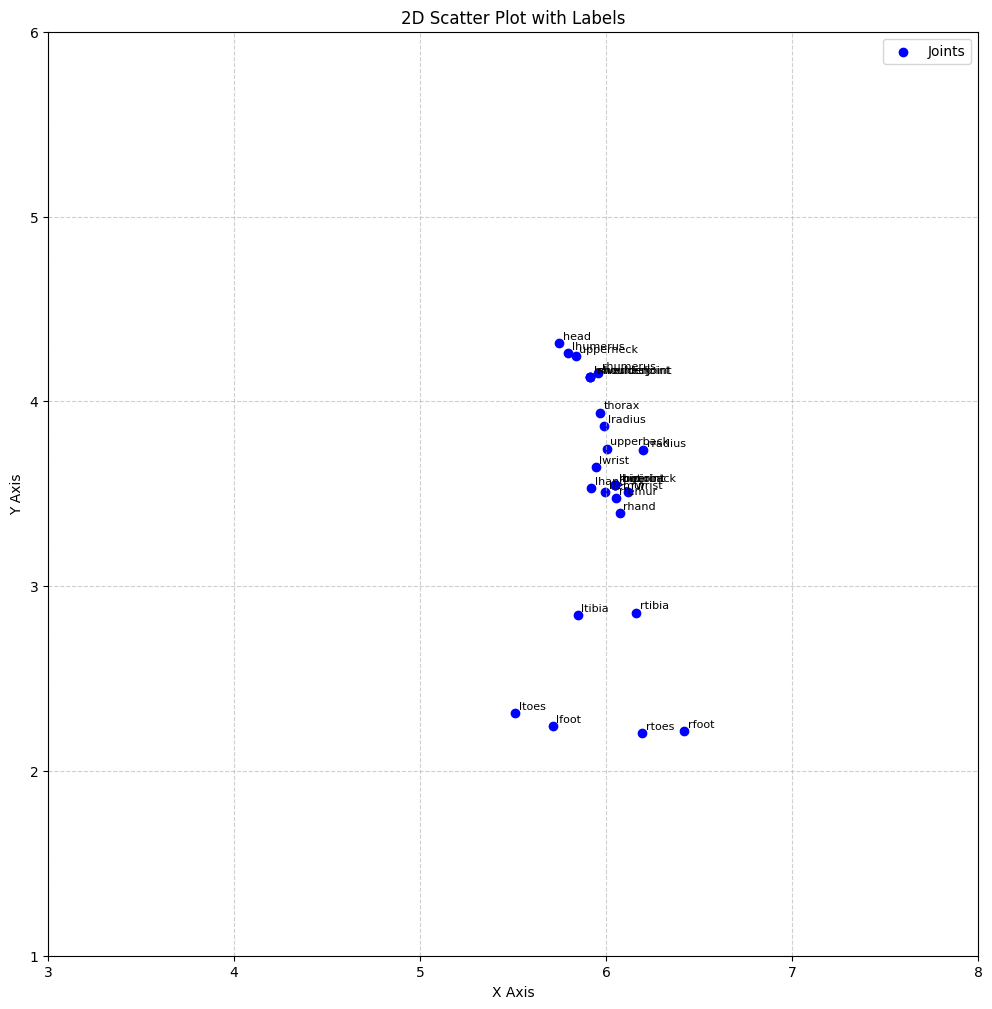

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = [vec[0] for vec in pose1positions[1:]]
y = [vec[1] for vec in pose1positions[1:]]
z = [vec[2] for vec in pose1positions[1:]]

labels = [joint.Name for joint, _, _ in root.layout()][1:]

plt.figure(figsize=(12, 12))
plt.scatter(x, y, color='blue', label='Joints')

for i, label in enumerate(labels):
    plt.text(x[i] + 0.02, y[i] + 0.02, label, fontsize=8)
    
plt.xlim(3, 8)
plt.ylim(1, 6)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("2D Scatter Plot with Labels")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

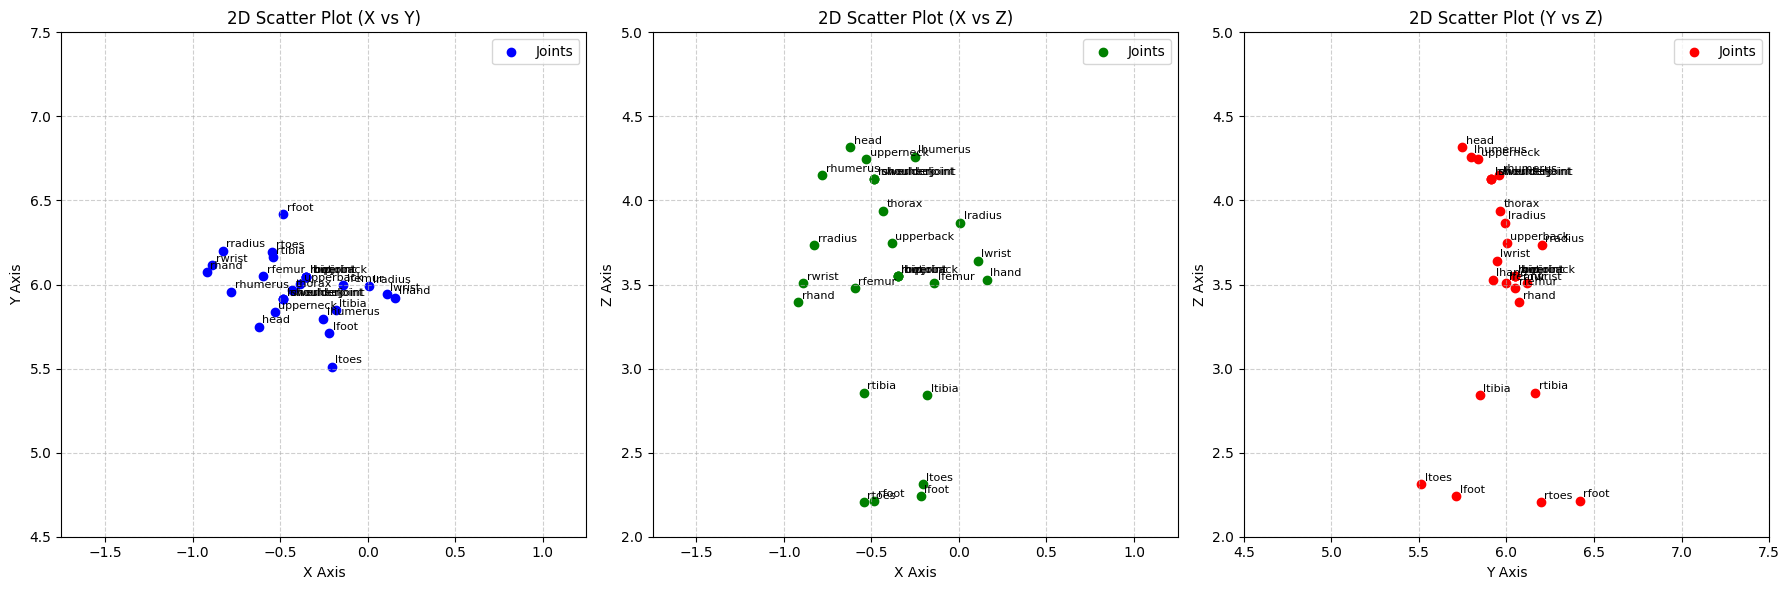

In [10]:
x = [vec[2] for vec in pose1positions[1:]]
y = [vec[0] for vec in pose1positions[1:]]
z = [vec[1] for vec in pose1positions[1:]]
labels = [joint.Name for joint, _, _ in root.layout()][1:]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(x, y, color='blue', label='Joints')
for i, label in enumerate(labels):
    axes[0].text(x[i] + 0.02, y[i] + 0.02, label, fontsize=8)
axes[0].set_xlim(-1.75, 1.25)
axes[0].set_ylim(4.5, 7.5)
axes[0].set_xlabel("X Axis")
axes[0].set_ylabel("Y Axis")
axes[0].set_title("2D Scatter Plot (X vs Y)")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].scatter(x, z, color='green', label='Joints')
for i, label in enumerate(labels):
    axes[1].text(x[i] + 0.02, z[i] + 0.02, label, fontsize=8)
axes[1].set_xlim(-1.75, 1.25)
axes[1].set_ylim(2, 5)
axes[1].set_xlabel("X Axis")
axes[1].set_ylabel("Z Axis")
axes[1].set_title("2D Scatter Plot (X vs Z)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

axes[2].scatter(y, z, color='red', label='Joints')
for i, label in enumerate(labels):
    axes[2].text(y[i] + 0.02, z[i] + 0.02, label, fontsize=8)
axes[2].set_xlim(4.5, 7.5)
axes[2].set_ylim(2, 5)
axes[2].set_xlabel("Y Axis")
axes[2].set_ylabel("Z Axis")
axes[2].set_title("2D Scatter Plot (Y vs Z)")
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [11]:
print(root.Children)
print(root.Children[0].Children)
print(root.Children[0].Children[0].Children)

[root]
[lhipjoint, rhipjoint, lowerback]
[lfemur]


In [12]:
type(root)

bvhio.lib.hierarchy.Joint.Joint

In [13]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color='blue'))])

fig.update_layout(scene=dict(
                        xaxis_title='X',
                        yaxis_title='Y',
                        zaxis_title='Z',
                        xaxis=dict(range=[-1.75, 1.25]),
                        yaxis=dict(range=[4.5, 7.5]),
                        zaxis=dict(range=[2, 5]),
                        aspectmode='cube', 
                    ),
                    title='3D joints plot from bvh file',
                    width=800,
                    height=800,
                    )

fig.show()

In [14]:
parent_children = [(joint.Parent.Name, joint.Name) for (joint, _, _) in root.loadPose(0).layout()[2:]]
parent_children

[('root', 'lhipjoint'),
 ('lhipjoint', 'lfemur'),
 ('lfemur', 'ltibia'),
 ('ltibia', 'lfoot'),
 ('lfoot', 'ltoes'),
 ('root', 'rhipjoint'),
 ('rhipjoint', 'rfemur'),
 ('rfemur', 'rtibia'),
 ('rtibia', 'rfoot'),
 ('rfoot', 'rtoes'),
 ('root', 'lowerback'),
 ('lowerback', 'upperback'),
 ('upperback', 'thorax'),
 ('thorax', 'lowerneck'),
 ('lowerneck', 'upperneck'),
 ('upperneck', 'head'),
 ('thorax', 'lshoulderjoint'),
 ('lshoulderjoint', 'lhumerus'),
 ('lhumerus', 'lradius'),
 ('lradius', 'lwrist'),
 ('lwrist', 'lhand'),
 ('thorax', 'rshoulderjoint'),
 ('rshoulderjoint', 'rhumerus'),
 ('rhumerus', 'rradius'),
 ('rradius', 'rwrist'),
 ('rwrist', 'rhand')]

In [15]:
parent_children_idxs = [(labels.index(parent), labels.index(child)) for parent, child in parent_children]
parent_children_idxs

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (0, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (0, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (13, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (13, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26)]

In [16]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

x_lines = []
y_lines = []
z_lines = []

for i, j in parent_children_idxs:
    x_lines += [x[i], x[j], None]
    y_lines += [y[i], y[j], None]
    z_lines += [z[i], z[j], None]
    
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color='blue'),
            text=labels,
            hoverinfo='text',
            name='Joints'),
        go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='royalblue', width=3),
            name='Bones'),
        ]
)

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
    xaxis=dict(range=[-1.75, 1.25]),
    yaxis=dict(range=[4.5, 7.5]),
    zaxis=dict(range=[2, 5]),
    aspectmode='cube', 
),
title='3D joints plot from bvh file',
width=800,
height=800
)

fig.show()

In [17]:
import plotly.graph_objects as go
import numpy as np
import bvhio
import itertools

seq_key = 'p7s1'

sample_path = f'gait3d/Sequences/{seq_key}/MoCap/{seq_key}.bvh'
frames_num = 2000
frames_per_sec = 25 * 4 

root = bvhio.readAsHierarchy(sample_path)
root = bvhio.Joint('Root', restPose=bvhio.Transform(scale=1)).attach(root)
first_pose = [joint.PositionWorld for (joint, index, depth) in root.loadPose(0).layout()]

x = [vec[2] for vec in first_pose]
y = [vec[0] for vec in first_pose]
z = [vec[1] for vec in first_pose]
labels = [joint.Name for joint, _, _ in root.layout()]

parent_children = [(joint.Parent.Name, joint.Name) for (joint, _, _) in root.loadPose(0).layout()[2:]]
parent_children_idxs = [(labels.index(parent), labels.index(child)) for parent, child in parent_children]

x_lines = []
y_lines = []
z_lines = []

for i, j in parent_children_idxs:
    x_lines += [x[i], x[j], None]
    y_lines += [y[i], y[j], None]
    z_lines += [z[i], z[j], None]


fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color='blue'),
            text=labels,
            hoverinfo='text',
            name='Joints'),
        go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='royalblue', width=3),
            hoverinfo='none',
            name='Bones'),
        ]
)

frames = []

for f_idx in range(frames_num):
    root.clearParent()
    pose = [joint.PositionWorld for (joint, index, depth) in root.loadPose(f_idx).layout()]

    x = [vec[2] for vec in pose]
    y = [vec[0] for vec in pose]
    z = [vec[1] for vec in pose]

    x_lines = []
    y_lines = []
    z_lines = []
    
    for i, j in parent_children_idxs:
        x_lines += [x[i], x[j], None]
        y_lines += [y[i], y[j], None]
        z_lines += [z[i], z[j], None]

    frames.append(go.Frame(
        data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color='blue'),
            text=labels,
            hoverinfo='text',
            name='Joints'),
        go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='royalblue', width=3),
            hoverinfo='none',
            name='Bones'),
        ],
        name=f'frame {f_idx}',
        layout=go.Layout(
            annotations=[dict(
                text=f'Frame {f_idx+1}',
                x=0.05, y=0.95, xref='paper', yref='paper',
                showarrow=False, font=dict(size=16, color="black"))]
        )
    ))

fig.frames = frames
    
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        xaxis=dict(range=[-5, 5]),
        yaxis=dict(range=[-12.5, 12.5]),
        zaxis=dict(range=[0, 10]),
        aspectmode='manual',
        aspectratio=dict(x=1, y=3, z=1)
    ),
    title='3D Gait Animation from BVH File',
    width=1000,
    height=800,
    annotations=[dict(
        text='Frame 1',
        x=0.05, y=0.95, xref='paper', yref='paper',
        showarrow=False, font=dict(size=16, color="black")
    )],
    updatemenus=[dict(
        type="buttons",
        showactive=True,
        buttons=[
            dict(label="Play",
                 method="animate",
                 args=[None, dict(frame=dict(duration=1000/frames_per_sec, redraw=True), fromcurrent=True)]),

            dict(label="Pause",
                 method="animate",
                 args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")]),
        ]
    )]
)


fig.show()


In [18]:
frames[0]

Frame({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'blue', 'size': 5},
              'mode': 'markers',
              'name': 'Joints',
              'text': [Root, root, lhipjoint, lfemur, ltibia, lfoot, ltoes,
                       rhipjoint, rfemur, rtibia, rfoot, rtoes, lowerback,
                       upperback, thorax, lowerneck, upperneck, head,
                       lshoulderjoint, lhumerus, lradius, lwrist, lhand,
                       rshoulderjoint, rhumerus, rradius, rwrist, rhand],
              'type': 'scatter3d',
              'x': [0.0, -0.40709298849105835, -0.40709298849105835,
                    0.13723337650299072, 0.057501547038555145,
                    -0.03788210451602936, 0.04688495397567749,
                    -0.40709298849105835, -1.0255215167999268, -0.9782751798629761,
                    -0.9266459345817566, -1.0511977672576904, -0.40709298849105835,
                    -0.41113999485969543, -0.42508697509765625,
        

In [19]:
parent_children

[('root', 'lhipjoint'),
 ('lhipjoint', 'lfemur'),
 ('lfemur', 'ltibia'),
 ('ltibia', 'lfoot'),
 ('lfoot', 'ltoes'),
 ('root', 'rhipjoint'),
 ('rhipjoint', 'rfemur'),
 ('rfemur', 'rtibia'),
 ('rtibia', 'rfoot'),
 ('rfoot', 'rtoes'),
 ('root', 'lowerback'),
 ('lowerback', 'upperback'),
 ('upperback', 'thorax'),
 ('thorax', 'lowerneck'),
 ('lowerneck', 'upperneck'),
 ('upperneck', 'head'),
 ('thorax', 'lshoulderjoint'),
 ('lshoulderjoint', 'lhumerus'),
 ('lhumerus', 'lradius'),
 ('lradius', 'lwrist'),
 ('lwrist', 'lhand'),
 ('thorax', 'rshoulderjoint'),
 ('rshoulderjoint', 'rhumerus'),
 ('rhumerus', 'rradius'),
 ('rradius', 'rwrist'),
 ('rwrist', 'rhand')]

In [20]:
import numpy as np

sample_joint = 'rtibia'
parents = [parent for parent, child in parent_children if child == sample_joint]
childs = [child for parent, child in parent_children if parent == sample_joint]
lever = (parents[0], sample_joint, childs[0])
lever_idx = tuple([labels.index(j_name) for j_name in lever])

lever_points = tuple([np.array((x[idx], y[idx], z[idx])) for idx in lever_idx])
lever_points

(array([ 0.00468898, -0.23698358,  3.48819494]),
 array([-0.06591286, -0.37554097,  1.88502944]),
 array([-0.14307666, -0.52702749,  0.13228428]))

In [21]:
import numpy as np

def calc_angle_from_points(points):
    p1, p2, p3 = points
    vec1 = p1 - p2 
    vec2 = p3 - p2

    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    angle_rad = np.arccos(dot_product / (norm_vec1 * norm_vec2))
    angle_deg = np.degrees(angle_rad)

    return angle_deg, angle_rad


angle_deg, angle_rad = calc_angle_from_points(lever_points)

print(f"Angle (degrees): {angle_deg}")
print(f"Angle (radians): {angle_rad}")

Angle (degrees): 179.99917382189835
Angle (radians): 3.1415782340617113


In [22]:
def calc_joint_angle(joint_name, parent_children):
    parents = [parent for parent, child in parent_children if child == joint_name]
    childs = [child for parent, child in parent_children if parent == joint_name]
    lever = (parents[0], joint_name, childs[0])
    lever_idx = tuple([labels.index(j_name) for j_name in lever])
    lever_points = tuple([np.array((x[idx], y[idx], z[idx])) for idx in lever_idx])
    return calc_angle_from_points(lever_points)

calc_joint_angle('lradius', parent_children)

(135.10419982259307, 2.358013120176588)

In [23]:
joint_name = 'rradius'
label = f"{joint_name}: {calc_joint_angle(joint_name, parent_children)[0]:.2f}°"
label

'rradius: 135.42°'

In [24]:
import plotly.graph_objects as go
import numpy as np
import bvhio
import itertools

seq_key = 'p7s1'

sample_path = f'gait3d/Sequences/{seq_key}/MoCap/{seq_key}.bvh'
frames_num = 2000
frames_per_sec = 25 #* 4 
angle_joints = ['ltibia', 'lfoot', 'rtibia', 'rfoot',]

root = bvhio.readAsHierarchy(sample_path)
root = bvhio.Joint('Root', restPose=bvhio.Transform(scale=1)).attach(root)
first_pose = [joint.PositionWorld for (joint, index, depth) in root.loadPose(0).layout()]

x = [vec[2] for vec in first_pose]
y = [vec[0] for vec in first_pose]
z = [vec[1] for vec in first_pose]
labels = [joint.Name for joint, _, _ in root.layout()]

parent_children = [(joint.Parent.Name, joint.Name) for (joint, _, _) in root.loadPose(0).layout()[2:]]
parent_children_idxs = [(labels.index(parent), labels.index(child)) for parent, child in parent_children]

x_lines = []
y_lines = []
z_lines = []

for i, j in parent_children_idxs:
    x_lines += [x[i], x[j], None]
    y_lines += [y[i], y[j], None]
    z_lines += [z[i], z[j], None]


fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color='blue'),
            text=labels,
            hoverinfo='text',
            name='Joints'),
        go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='royalblue', width=3),
            hoverinfo='none',
            name='Bones'),
        ]
)

frames = []

for f_idx in range(frames_num):
    root.clearParent()
    pose = [joint.PositionWorld for (joint, index, depth) in root.loadPose(f_idx).layout()]

    x = [vec[2] for vec in pose]
    y = [vec[0] for vec in pose]
    z = [vec[1] for vec in pose]

    x_lines = []
    y_lines = []
    z_lines = []

    annotation_text = f'Frame {f_idx+1} '
    for joint_name in angle_joints:
        annotation_text += f"| {joint_name}: {calc_joint_angle(joint_name, parent_children)[0]:.2f}°"
    
    for i, j in parent_children_idxs:
        x_lines += [x[i], x[j], None]
        y_lines += [y[i], y[j], None]
        z_lines += [z[i], z[j], None]

    frames.append(go.Frame(
        data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color='blue'),
            text=labels,
            hoverinfo='text',
            name='Joints'),
        go.Scatter3d(
            x=x_lines, y=y_lines, z=z_lines,
            mode='lines',
            line=dict(color='royalblue', width=3),
            hoverinfo='none',
            name='Bones'),
        ],
        name=f'frame {f_idx}',
        layout=go.Layout(
            annotations=[dict(
                text=annotation_text,
                x=0.05, y=0.95, xref='paper', yref='paper',
                showarrow=False, font=dict(size=16, color="black"))]
        )
    ))

fig.frames = frames
    
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        xaxis=dict(range=[-5, 5]),
        yaxis=dict(range=[-12.5, 12.5]),
        zaxis=dict(range=[0, 10]),
        aspectmode='manual',
        aspectratio=dict(x=1, y=3, z=1)
    ),
    title='3D Gait Animation from BVH File',
    width=1000,
    height=800,
    annotations=[dict(
        text='Frame 1',
        x=0.05, y=0.95, xref='paper', yref='paper',
        showarrow=False, font=dict(size=16, color="black")
    )],
    updatemenus=[dict(
        type="buttons",
        showactive=True,
        buttons=[
            dict(label="Play",
                 method="animate",
                 args=[None, dict(frame=dict(duration=1000/frames_per_sec, redraw=True), fromcurrent=True)]),

            dict(label="Pause",
                 method="animate",
                 args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")]),
        ]
    )]
)


fig.show()
